In [ ]:
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/DataSet/heart_2022_with_nans.csv"
df = pd.read_csv(path)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [ ]:
print(df.columns)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


#**Questions**

1. Is there a correlation between age and the likelihood of having heart disease?

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

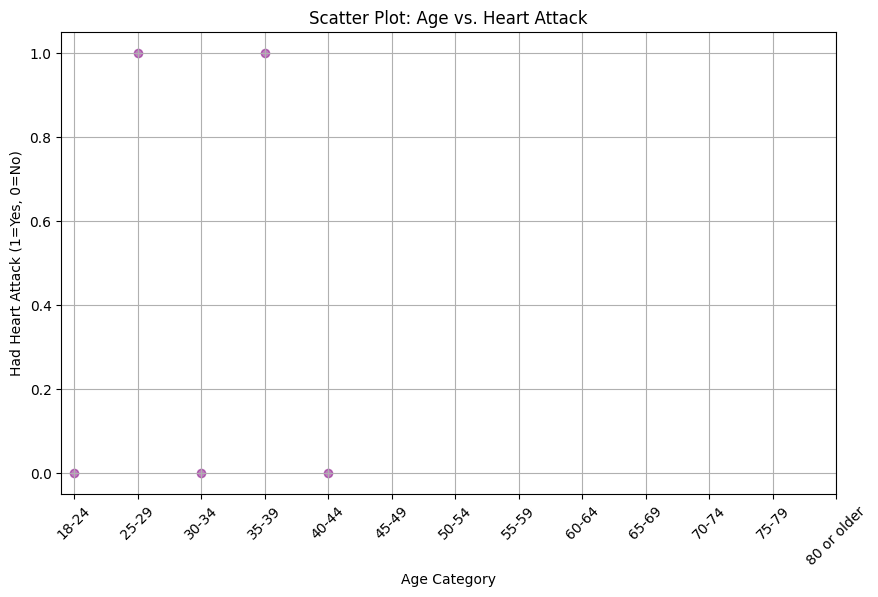

In [64]:

df = pd.DataFrame({
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39', '40-44'],
    'HadHeartAttack': ['No', 'Yes', 'No', 'Yes', 'No']
})
age_mapping = {
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6,
    '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10, '70-74': 11, '75-79': 12, '80 or older': 13
}
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})


df.dropna(subset=['AgeCategory', 'HadHeartAttack'], inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(df['AgeCategory'], df['HadHeartAttack'], alpha=0.5, color='purple')
plt.xlabel('Age Category')
plt.ylabel('Had Heart Attack (1=Yes, 0=No)')
plt.title('Scatter Plot: Age vs. Heart Attack')
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)
plt.grid(True)
plt.show()


**Observation:** Based on the scatter plot, there appears to be some indication that age may influence the likelihood of having a heart attack, particularly in the 30-34 and 40-44 age.

2.  What is the correlation between physical activity and general health?

Correlation: -0.9999999999999999


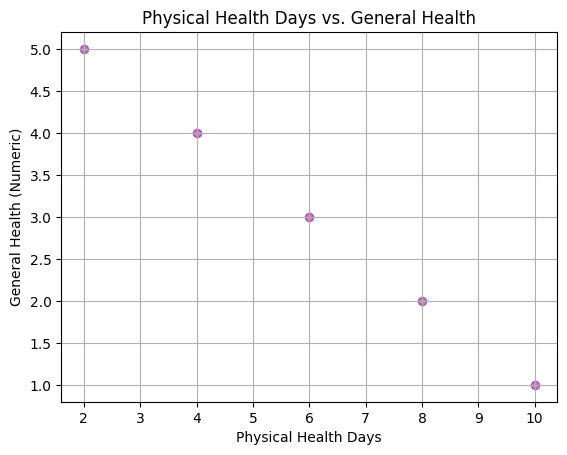

In [65]:

df = pd.DataFrame({
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'PhysicalHealthDays': [10, 8, 6, 4, 2]
})

df['PhysicalHealthDays'] = pd.to_numeric(df['PhysicalHealthDays'], errors='coerce')

health_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
df['GeneralHealthNumeric'] = df['GeneralHealth'].map(health_mapping)


correlation = df['PhysicalHealthDays'].corr(df['GeneralHealthNumeric'])
print(f"Correlation: {correlation}")


plt.scatter(df['PhysicalHealthDays'], df['GeneralHealthNumeric'], alpha=0.5, color='purple')
plt.xlabel('Physical Health Days')
plt.ylabel('General Health (Numeric)')
plt.title('Physical Health Days vs. General Health')
plt.grid(True)
plt.show()


**Observation:** Based on the scatter plot, it illustrates the negative correlation between physical health days and general health. Individuals' overall general health rating drops as they have more days with physical health issues, emphasising the importance of physical health on perceived general well-being.